### In this assignment you will work with a beer data set. Please provide an answer to the questions below. Answer as many questions as possible:


- Rank the top 3 breweries which produce the strongest beers.

- Which year did beers enjoy the highest ratings?

- Based on the users' ratings, which factors are important among taste, aroma, appearance, and palette?

- If you were to recommend 3 beers to your friends based on this data, which ones would you recommend?

- Which beer style seems to be the favourite based on the reviews written by users? How does written reviews compare to overall review score for the beer style?

## Data Description

The provided compressed file BeerDataScienceProject.tar.bz2 contains data about beers and their reviews. It has the following columns:

beer_ABV - alcohol by volume

beer_beerId - beer ID

beer_brewerId - beer brewer ID

beer_name - beer name

beer_style - beer style

review_appearance - review on the beer's appearance

review_palette - review on the beer's palette (colours)

review_overall - overall beer review

review_taste - review on the beer's taste

review_profileName - profile name of the reviewer

review_aroma - review on the beer's aroma

review_text - the full text of the review

review_time - timestamp when the review was made

In [1]:
import pandas as pd

df = pd.read_csv("BeerDataScienceProject.tar.bz2", compression="bz2")
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


In [2]:
df['review_text'][5]

"Poured from the bottle into a Chimay goblet. Appearance: Pours a slightly cloudy yellow/orange color with a half finger of fluffy white head. The head fades to a small layer on top of the pour. Smell: Very light and crisp. I'm definitely picking up the ginger, but it's not overly powerful. There is a slight sweetness from the malt as well. Taste: Very light and refreshing. The ginger shows up right away and then fades towards the finish of the sip. The finish is malty and bread like. Mouthfeel: The body is on the thin side with smooth carbonation and a very dry finish. Overall: This is a light and refreshing beer, but nothing spectacular. The amount of ginger is nice, but I would have liked to have more going on."

In [3]:
df.describe()

,beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_palette,review_overall,review_taste,review_aroma,review_time
count,508590.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,5.288700e+05
mean,7.017442,22098.466016,2598.423429,3.864522,3.758926,3.833197,3.765993,3.817350,1.224885e+09
std,2.204460,22158.284352,5281.805350,0.604010,0.685335,0.709962,0.669018,0.718903,7.605600e+07
min,0.010000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,8.843904e+08
25%,5.300000,1745.000000,132.000000,3.500000,3.500000,3.500000,3.500000,3.500000,1.174613e+09
50%,6.500000,14368.000000,394.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.240366e+09
75%,8.500000,40528.000000,1475.000000,4.000000,4.000000,4.500000,4.000000,4.500000,1.288560e+09
max,57.700000,77310.000000,27980.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.326277e+09


### Rank the top 3 breweries which produce the strongest beers.


I will be getting the top 3 breweries based on their review_overall scores grouped on the beer_brewerId

In [4]:
# get the ABV mean of each brewery
brewery_abv = df.groupby('beer_brewerId')['beer_ABV'].mean()
# sort the mean ABV of brewery in descending order
brewery_abv_sorted = brewery_abv.sort_values(ascending=False)

print("Top 3 breweries producing the strongest beers are : ")
# get top 3
brewery_abv_sorted.head(3)

Top 3 breweries producing the strongest beers are : 


beer_brewerId
6513     19.228824
736      13.750000
24215    12.466667
Name: beer_ABV, dtype: float64

### Which year did beers enjoy the highest ratings?


In [5]:
# convert Unix epoch to more readable datetime and then get the years.
df['review_year'] = pd.to_datetime(df['review_time']).dt.year

# get the average review_overall of each review_year and get the best year by sorting
year_best = df.groupby('review_year')['review_overall'].mean().sort_values(ascending=False).head(1)

year_best

review_year
1970    3.833197
Name: review_overall, dtype: float64

### Based on the users' ratings, which factors are important among taste, aroma, appearance, and palette?

In [10]:
# get the absolute correlation value for each factors
corr_taste = abs(df['review_overall'].corr(df['review_taste']))
corr_aroma = abs(df['review_overall'].corr(df['review_aroma']))
corr_appearance = abs(df['review_overall'].corr(df['review_appearance']))
corr_palette = abs(df['review_overall'].corr(df['review_palette']))

# put it into map
corr_map = {
    'Taste' : corr_taste,
    'Aroma' : corr_aroma,
    'Appearance' : corr_appearance,
    'Palette' : corr_palette,
}

# output the correlation value
print(f"Taste: {corr_taste:.2f}")
print(f"Aroma: {corr_aroma:.2f}")
print(f"Appearance: {corr_appearance:.2f}")
print(f"Palette: {corr_palette:.2f}")

# get the most important factor
imp_factor = max(corr_map, key = corr_map.get)
print(f"The most important factor is : {imp_factor}")

Taste: 0.69
Aroma: 0.78
Appearance: 0.49
Palette: 0.60
The most important factor is : Aroma


### If you were to recommend 3 beers to your friends based on this data, which ones would you recommend?


In Korea, the important factor is the "cleaness" in the gulp of beer. That factor can be determined by usually low level of ABV.

The typical ABV koreans are used to starts with 4.5. So I will start with ABV over 4.5 ABV and under 5.5.

With this, we will get the top 3 beer from the list based on their overall review score.

In [7]:
fav_ABV_recommend = df[(df['beer_ABV'] >= 4.5) & (df['beer_ABV'] <= 5.5)].sort_values(by="review_overall", ascending=False)
fav_ABV_recommend.head(3)

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,review_year
491898,5.2,21578,132,Über Pils,German Pilsener,4.5,4.0,5.0,4.5,ellisdee97,4.5,A: Pours light gold with light head which quic...,1148518604,1970
49950,5.0,1622,394,Stoudt's Scarlet Lady ESB,Extra Special / Strong Bitter (ESB),4.0,5.0,5.0,4.0,AtlasBrew,5.0,Stoudt's Scarlet Lady ESB 12oz bottle poured i...,1241674335,1970
448248,4.8,3149,590,Home Town Blonde,German Pilsener,4.0,4.0,5.0,4.5,ChiSox05,4.0,Quickly frothed up and then dissipated mostly ...,1182568122,1970


Based on outcome, Pilsener is what we got, and pilsener actually is one of the types Koreans like the most, which is a part of a lager.

### Which beer style seems to be the favourite based on the reviews written by users? How does written reviews compare to overall review score for the beer style?

First, I will start by getting the overall review score for the beer style.

In [8]:
best_style_by_score = df.groupby('beer_style')['review_overall'].mean().sort_values(ascending=False)
best_style_by_score.head(1)

beer_style
Gueuze    4.140952
Name: review_overall, dtype: float64

Now we will check the text

In [ ]:
# Download NLTK stopwords (if not already downloaded)
nltk.download('stopwords')
nltk.download('punkt')

In [16]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize



# Initialize stopwords and word tokenizer
stop_words = set(stopwords.words('english'))

# Text preprocessing function
def preprocess_text(text):
    if isinstance(text, str):
        # Remove special characters, punctuation, and non-alphanumeric characters
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        # Convert text to lowercase
        text = text.lower()

        # Tokenize the text
        tokens = word_tokenize(text)

        # Remove stopwords
        filtered_tokens = [word for word in tokens if word not in stop_words]

        # Join tokens back into a cleaned text
        cleaned_text = ' '.join(filtered_tokens)
    
        return cleaned_text
    else :
        return ''

# Apply text preprocessing to the 'review_text' column
df['cleaned_review_text'] = df['review_text'].apply(preprocess_text)

# Display the cleaned review text
print(df[['review_text', 'cleaned_review_text']].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                         review_text  \
0  A lot of foam. But a lot. In the smell some ba...   
1  Dark red color, light beige foam, average. In ...   
2  Almost totally black. Beige foam, quite compac...   
3  Golden yellow color. White, compact foam, quit...   
4  According to the website, the style for the Ca...   

                                 cleaned_review_text  
0  lot foam lot smell banana lactic tart good sta...  
1  dark red color light beige foam average smell ...  
2  almost totally black beige foam quite compact ...  
3  golden yellow color white compact foam quite c...  
4  according website style caldera cauldron chang...  


In [20]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [21]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Calculate sentiment scores for cleaned review text
df['sentiment_scores'] = df['cleaned_review_text'].apply(lambda x: sid.polarity_scores(x))

# Define a threshold for sentiment labeling
threshold = 0.1

# Assign sentiment labels based on compound scores
df['sentiment_label'] = df['sentiment_scores'].apply(lambda x: 'positive' if x['compound'] > threshold else 'negative' if x['compound'] < -threshold else 'neutral')

# Analyze and visualize sentiment distribution
sentiment_distribution = df['sentiment_label'].value_counts()
print(sentiment_distribution)


positive    497955
negative     22395
neutral       8520
Name: sentiment_label, dtype: int64


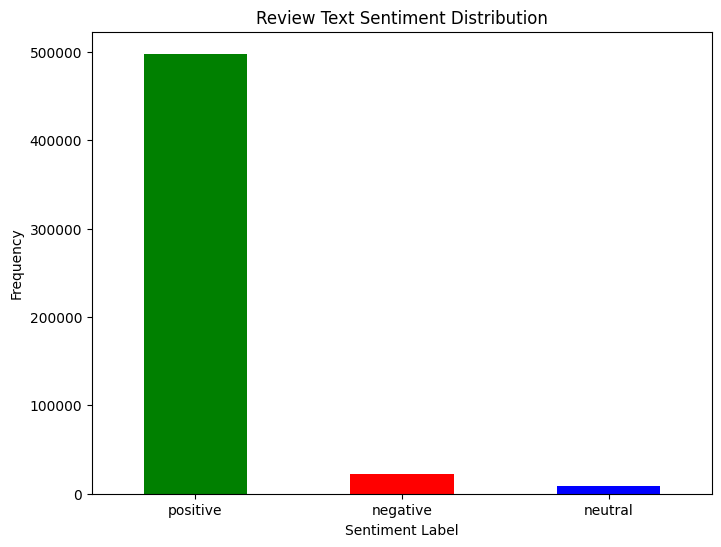

In [27]:
import matplotlib.pyplot as plt

# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_distribution.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Review Text Sentiment Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

# Show the plot
plt.show()

In [25]:
# Group by beer style and calculate sentiment distribution
# Here we are going to normalize to get the relative frequency(=proportion) rather than absolute counts
sentiment_dist_by_style = df.groupby('beer_style')['sentiment_label'].value_counts(normalize=True).unstack().fillna(0)

# Calculate the percentage of positive reviews for each style
sentiment_dist_by_style['percentage_positive'] = sentiment_dist_by_style['positive'] * 100

# Rank beer styles by percentage of positive reviews (desc)
favorite_styles = sentiment_dist_by_style.sort_values(by='percentage_positive', ascending=False)

# Display the top favorite styles
print(favorite_styles[['positive', 'percentage_positive']].head())


sentiment_label   positive  percentage_positive
beer_style                                     
Braggot           0.984925            98.492462
Eisbock           0.984615            98.461538
Quadrupel (Quad)  0.978516            97.851642
Flanders Red Ale  0.975507            97.550735
Kvass             0.974576            97.457627


So by overall_ratings, Gueuze was the style that had the highest score.

However, with text reviews users submitted, we could find that Braggot had the most positive text reviews.

## Recap

It was fun to get to review text analysis using the sentiment analysis.